In [10]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [11]:
# Read the csv file into a pandas DataFrame

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [12]:
cleanup_class= {"class": {"tested_positive": 1, "tested_negative": 0}}

In [13]:
diabetes.replace(cleanup_class, inplace=True)
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# A look at various data matrices without data cleaning (as the data is given)
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [16]:
#looking into the data to see how many columns have 0 values. If choice is made to drop rows with missing or 0 values then about 374 rows will have to be dropped from the dataset-lowing the sample size lamost by 40 % 
print((diabetes[['plas','pres','skin','insu','mass']] == 0).sum())

plas      5
pres     35
skin    227
insu    374
mass     11
dtype: int64


In [17]:
#Replacing 0 values with NaN for variables that should logically should have 0 values(pregnancy and class are exceptions for this)

diabetes[['plas','pres','skin','insu','mass']] = diabetes[['plas','pres','skin','insu','mass']].replace(0, np.NaN)
print(diabetes.head(10))

   preg   plas  pres  skin   insu  mass   pedi  age  class
0     6  148.0  72.0  35.0    NaN  33.6  0.627   50      1
1     1   85.0  66.0  29.0    NaN  26.6  0.351   31      0
2     8  183.0  64.0   NaN    NaN  23.3  0.672   32      1
3     1   89.0  66.0  23.0   94.0  28.1  0.167   21      0
4     0  137.0  40.0  35.0  168.0  43.1  2.288   33      1
5     5  116.0  74.0   NaN    NaN  25.6  0.201   30      0
6     3   78.0  50.0  32.0   88.0  31.0  0.248   26      1
7    10  115.0   NaN   NaN    NaN  35.3  0.134   29      0
8     2  197.0  70.0  45.0  543.0  30.5  0.158   53      1
9     8  125.0  96.0   NaN    NaN   NaN  0.232   54      1


In [21]:
#since droping all the rows with NaN drastically lowers the sample size, we opted to replace NaN values with imputed average values

diabetes.fillna(diabetes.mean(), inplace=True)
# count the number of NaN values in each column
print(diabetes.isnull().sum())

#output below shows that there are no NaN values in any of our 9 columns

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [10]:
#A comparative look at the data after missing values have been accounted with feature means.Eg, noitce how the min values in columns 1-5 look more reasonable with this method 
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = diabetes[['plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']]
y = diabetes["class"].values.reshape(-1, 1)
print(X.shape, y.shape)

(768, 8) (768, 1)


In [12]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Dawit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dawit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Dawit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Dawit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Dawit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dawit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

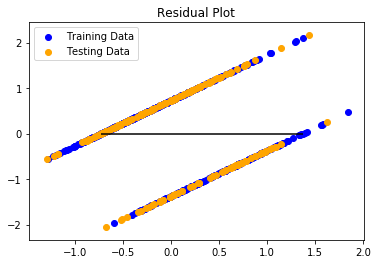

In [16]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.781642864696933, R2: 0.23227429351874096


In [18]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7791631949309333, R2: 0.2347098127423195


In [19]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7816409200180797, R2: 0.23227620357256995


In [20]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7797159168013815, R2: 0.23416693208973138


In [54]:
import numpy 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(483)

In [55]:
data=pd.read_csv('diabetes.csv')

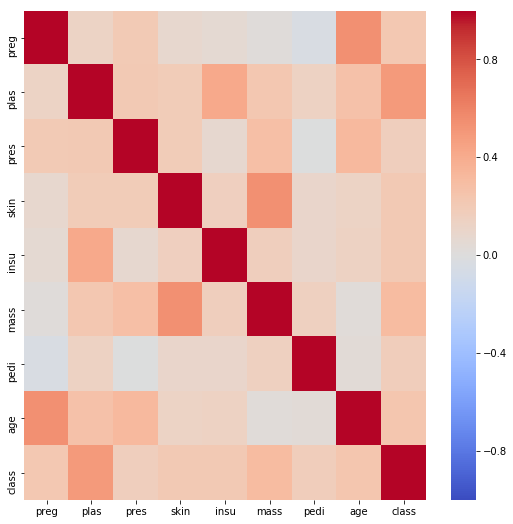

In [56]:
plt.figure(figsize=(9,9))
sns.heatmap(diabetes.corr(),
            vmin=-1,
            cmap='coolwarm');

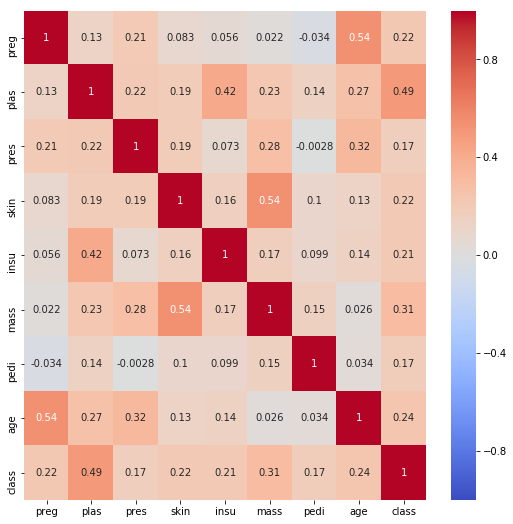

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(diabetes.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
            

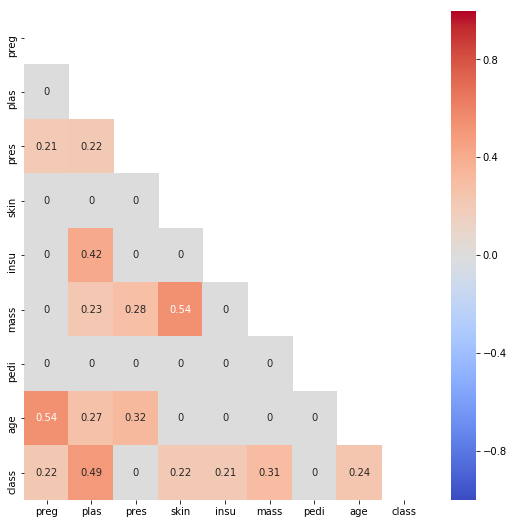

In [48]:
mask = np.zeros_like(diabetes_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,9))
sns.heatmap(diabetes_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

In [ ]:
#The above heat map(with numeric representations) dipicts the strength  of correlations between among the x variables and the Y value as well. It will be interesting to focus on those variables with higher correclations see what impact it will have on the results of the simple regression model.  